In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shows = pd.read_pickle("full_shows_tmp_5_tvmaze+imdb.pkl")

### Step 1: get rid of any columns we know we don't need

In [3]:
shows.columns

Index(['genre', 'link', 'network', 'status', 'tagline', 'title', 'years',
       'start_year', 'end_year', 'synopsis', 'primary_genre',
       'secondary_genre', 'Comedy', 'Drama', 'Game Show', 'Reality', 'Sci-fi',
       'Talk', 'Crime', 'Action', 'Fantasy', 'Animated', 'Horror', 'Legal',
       'Medical', 'tvmaze_name', 'tvmaze_tv_id', 'imdb_id', 'tvmaze_prem_date',
       'tvmaze_rating', 'tvmaze_runtime', 'tvmaze_ep_day', 'imdb_actors',
       'imdb_awards', 'imdb_boxoffice', 'imdb_country', 'imdb_dvd',
       'imdb_director', 'imdb_genre', 'imdb_language', 'imdb_metascore',
       'imdb_plot', 'imdb_poster', 'imdb_production', 'imdb_rated',
       'imdb_ratings', 'imdb_released', 'imdb_response', 'imdb_runtime',
       'imdb_title', 'imdb_type', 'imdb_website', 'imdb_writer', 'imdb_year',
       'imdb_rating', 'imdb_votes', 'imdb_totalseasons'],
      dtype='object')

In [4]:
cols_to_del = ['imdb_type','imdb_dvd','imdb_boxoffice','imdb_response','imdb_production',
               'imdb_metascore','imdb_poster','imdb_ratings','tvmaze_tv_id','imdb_title','tvmaze_name']
shows = shows.drop(cols_to_del,axis=1)

### Step 2: Conform null values

In [5]:
shows = shows.replace('n/a',np.nan).replace('N/A',np.nan)

### Step 3: Downcast everything to make it a bit more memory efficient

In [6]:
shows.dtypes

genre                category
link                 category
network              category
status               category
tagline              category
title                category
years                category
start_year              int64
end_year              float64
synopsis             category
primary_genre        category
secondary_genre      category
Comedy                  int64
Drama                   int64
Game Show               int64
Reality                 int64
Sci-fi                  int64
Talk                    int64
Crime                   int64
Action                  int64
Fantasy                 int64
Animated                int64
Horror                  int64
Legal                   int64
Medical                 int64
imdb_id                object
tvmaze_prem_date       object
tvmaze_rating         float64
tvmaze_runtime        float64
tvmaze_ep_day          object
imdb_actors            object
imdb_awards            object
imdb_country           object
imdb_direc

In [7]:
shows.columns

Index(['genre', 'link', 'network', 'status', 'tagline', 'title', 'years',
       'start_year', 'end_year', 'synopsis', 'primary_genre',
       'secondary_genre', 'Comedy', 'Drama', 'Game Show', 'Reality', 'Sci-fi',
       'Talk', 'Crime', 'Action', 'Fantasy', 'Animated', 'Horror', 'Legal',
       'Medical', 'imdb_id', 'tvmaze_prem_date', 'tvmaze_rating',
       'tvmaze_runtime', 'tvmaze_ep_day', 'imdb_actors', 'imdb_awards',
       'imdb_country', 'imdb_director', 'imdb_genre', 'imdb_language',
       'imdb_plot', 'imdb_rated', 'imdb_released', 'imdb_runtime',
       'imdb_website', 'imdb_writer', 'imdb_year', 'imdb_rating', 'imdb_votes',
       'imdb_totalseasons'],
      dtype='object')

In [8]:
# Converting to categorical - getting rid of this since it causes pd.concat problems later on
cat_columns = ['tvmaze_ep_day','imdb_awards', 'imdb_country', 'imdb_director', 'imdb_genre',
       'imdb_language','imdb_rated','imdb_website','imdb_writer','imdb_year','imdb_actors','imdb_plot']
#shows[cat_columns] = shows[cat_columns].apply(lambda x: x.astype('category'))

# Converting to numeric
def downcast_numeric(x):
    return pd.to_numeric(x,downcast='integer')

shows['imdb_votes'] = shows['imdb_votes'].astype('object').str.replace(',','')
shows['imdb_runtime'] = shows.imdb_runtime.str.replace(' min','')

num_columns = ['imdb_rating','imdb_votes','imdb_runtime','imdb_totalseasons','Comedy', 'Drama', 'Game Show', 
        'Reality', 'Sci-fi','Talk', 'Crime', 'Action', 'Fantasy', 'Animated', 'Horror', 'Legal',
       'Medical','start_year','end_year']
shows[num_columns] = shows[num_columns].apply(downcast_numeric)

# Converting to datetime - OLD METHOD
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
#shows['imdb_released'] = shows['imdb_released'].astype(str).replace('nan',np.nan).replace('N/A',np.nan)
#shows['imdb_released'] = shows['imdb_released'].apply(lambda x: x.split(' ') if x is not np.nan else np.nan)
#shows['imdb_released'] = shows['imdb_released'].apply(lambda x: [x[0],str(month_dict[str(x[1]).lower()]),x[2]] if x is not np.nan else np.nan)
#shows['imdb_released'] = shows['imdb_released'].apply(lambda x: [x[2],x[1],x[0]] if x is not np.nan else np.nan)
#shows['imdb_released'] = shows['imdb_released'].apply(lambda x: '/'.join(x) if x is not np.nan else np.nan)

shows['imdb_released'] = pd.to_datetime(shows['imdb_released'],format='%d %b %Y')

date_columns = ['imdb_released','tvmaze_prem_date']

shows[date_columns] = shows[date_columns].apply(pd.to_datetime)

In [9]:
shows.dtypes

genre                      category
link                       category
network                    category
status                     category
tagline                    category
title                      category
years                      category
start_year                    int16
end_year                    float64
synopsis                   category
primary_genre              category
secondary_genre            category
Comedy                         int8
Drama                          int8
Game Show                      int8
Reality                        int8
Sci-fi                         int8
Talk                           int8
Crime                          int8
Action                         int8
Fantasy                        int8
Animated                       int8
Horror                         int8
Legal                          int8
Medical                        int8
imdb_id                      object
tvmaze_prem_date     datetime64[ns]
tvmaze_rating               

In [10]:
shows[['imdb_released','title']]

,imdb_released,title
0,2010-09-23,$#*! My Dad Says
1,2018-05-29,100 Code
2,2010-07-11,101 Ways to Leave a Gameshow
3,2015-01-16,12 Monkeys
4,2017-03-31,13 Reasons Why
5,2009-06-11,16 and Pregnant
6,2012-12-17,1600 Penn
7,2010-01-04,18 to Life
8,2008-09-29,19 Kids and Counting
9,2011-09-19,2 Broke Girls


### Step 4: Getting rid of datapoints we don't think we'll be able to use
There are two items where the IMDB ID is null, and we won't have information about them. One is the Crash Course Engineering show, which is more a of a web series. And the other is Ink Master: Redemption, which IMDB classifies simply as a group of episodes of the Ink Master series. I think it makes sense to get rid of both of these.

In [11]:
# Confirming that there's just these two...
len(shows) - len(shows[shows['imdb_id'].notnull()])

2

In [12]:
shows = shows[shows['imdb_id'].notnull()]

In [13]:
# We can now drop this column
shows = shows.drop('imdb_id',axis=1)
shows.shape[0]

1571

### Step 5: Deriving a couple more variables that might be useful

In [14]:
# Getting definitive about premiere date. In this case, we'll take the most recent date of the two.
# In the few instances where there is a discrepancy or one is missing, the latest show is the one to which
# ismyshowcancelled.com is referring

ref_cols = ['title','imdb_released','tvmaze_prem_date']
shows[ref_cols].head(30)

,title,imdb_released,tvmaze_prem_date
0,$#*! My Dad Says,2010-09-23,2010-09-23
1,100 Code,2018-05-29,2015-03-11
2,101 Ways to Leave a Gameshow,2010-07-11,2010-07-10
3,12 Monkeys,2015-01-16,2015-01-16
4,13 Reasons Why,2017-03-31,2017-03-31
5,16 and Pregnant,2009-06-11,2009-06-11
6,1600 Penn,2012-12-17,2012-12-17
7,18 to Life,2010-01-04,2010-01-04
8,19 Kids and Counting,2008-09-29,2008-09-29
9,2 Broke Girls,2011-09-19,2011-09-19


In [15]:
shows['prem_date'] = np.max(shows[date_columns],axis=1)
shows = shows.drop(['imdb_released','tvmaze_prem_date'],axis=1)

# Fixing an individual missing date
shows.loc[shows['title'] == 'Three Rivers','prem_date'] = pd.datetime(2009,10,4)

In [16]:
# Creating columns for quarter and month of premiere
shows['quarter'] = pd.to_numeric(shows['prem_date'].dt.quarter,downcast='integer')

rev_month_dict = {y:x for x,y in month_dict.items()}
shows['month'] = shows['prem_date'].dt.month.astype('category')

def period(date,freq):
    if date is not np.nan:
        date = pd.Period(date,freq=freq,second=None)
    return date

shows['yr_quarter'] = shows['prem_date'].apply(period,args=('Q')).astype('category')
shows['yr_mo'] = shows['prem_date'].apply(period,args=('M')).astype('category')

### Step 6: Defining Cancellation
We already have the "cancelled" column, but I think we should narrow down what exactly we mean by cancellation. Let's allow for a few different cutoffs, like after 1 year or 2 years.

In [17]:
shows.columns

Index(['genre', 'link', 'network', 'status', 'tagline', 'title', 'years',
       'start_year', 'end_year', 'synopsis', 'primary_genre',
       'secondary_genre', 'Comedy', 'Drama', 'Game Show', 'Reality', 'Sci-fi',
       'Talk', 'Crime', 'Action', 'Fantasy', 'Animated', 'Horror', 'Legal',
       'Medical', 'tvmaze_rating', 'tvmaze_runtime', 'tvmaze_ep_day',
       'imdb_actors', 'imdb_awards', 'imdb_country', 'imdb_director',
       'imdb_genre', 'imdb_language', 'imdb_plot', 'imdb_rated',
       'imdb_runtime', 'imdb_website', 'imdb_writer', 'imdb_year',
       'imdb_rating', 'imdb_votes', 'imdb_totalseasons', 'prem_date',
       'quarter', 'month', 'yr_quarter', 'yr_mo'],
      dtype='object')

In [18]:
# Calculating how long shows ran
# The minimum of imdb_totalseasons(if available) and difference in start/end year + 1
shows['yrs_run'] = shows['end_year']-shows['start_year']+1
shows['yrs_run'] = shows[['yrs_run','imdb_totalseasons']].min(axis=1)

# Cancelled after 1 season flag
shows['one_season_cancel'] = np.where((shows['yrs_run'] == 1) & (shows['status'] == 'Cancelled'),1,0)
shows['two_season_cancel'] = np.where((shows['yrs_run'] <= 2) & (shows['status'] == 'Cancelled'),1,0)
shows['three_season_cancel'] = np.where((shows['yrs_run'] <= 3) & (shows['status'] == 'Cancelled'),1,0)

In [19]:
np.where(shows['yrs_run'] == shows['imdb_totalseasons'],1,0).sum()

1434

In [20]:
shows[['title','yrs_run','imdb_totalseasons','status']]

,title,yrs_run,imdb_totalseasons,status
0,$#*! My Dad Says,1.0,1.0,Cancelled
1,100 Code,1.0,1.0,Coming Soon
2,101 Ways to Leave a Gameshow,1.0,NaN,Cancelled
3,12 Monkeys,4.0,4.0,On Air
4,13 Reasons Why,2.0,2.0,On Air
5,16 and Pregnant,5.0,5.0,On Air
6,1600 Penn,1.0,1.0,Cancelled
7,18 to Life,2.0,2.0,Cancelled
8,19 Kids and Counting,8.0,15.0,Cancelled
9,2 Broke Girls,6.0,6.0,Cancelled


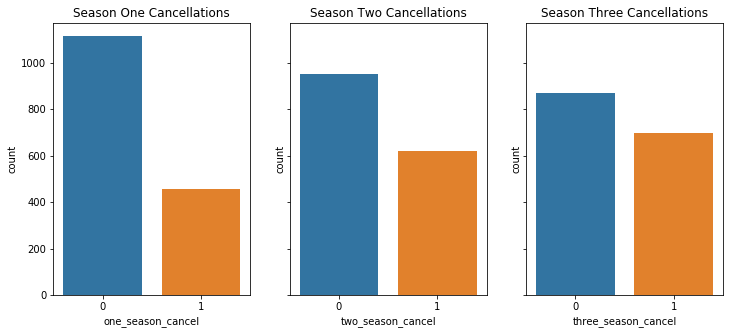

In [21]:
# Plotting out the class sizes depending on these different distinctions.
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5),sharey=True)
sns.countplot(shows['one_season_cancel'],ax=ax1)
ax1.set_title("Season One Cancellations")
sns.countplot(shows['two_season_cancel'],ax=ax2)
ax2.set_title("Season Two Cancellations")
sns.countplot(shows['three_season_cancel'],ax=ax3)
ax3.set_title("Season Three Cancellations")
plt.show()

In [22]:
pct_canc_1 = shows['one_season_cancel'].value_counts()[1]/shows['one_season_cancel'].value_counts().sum()
pct_canc_2 = shows['two_season_cancel'].value_counts()[1]/shows['two_season_cancel'].value_counts().sum()
pct_canc_3 = shows['three_season_cancel'].value_counts()[1]/shows['three_season_cancel'].value_counts().sum()
print('{0:.1f}% of shows are cancelled within one year of premiere'.format(pct_canc_1*100))
print('{0:.1f}% of shows are cancelled within two years of premiere'.format(pct_canc_2*100))
print('{0:.1f}% of shows are cancelled within three years of premiere'.format(pct_canc_3*100))

29.0% of shows are cancelled within one year of premiere
39.5% of shows are cancelled within two years of premiere
44.5% of shows are cancelled within three years of premiere


60% of cancellations occur in season 1, and then cancellation becomes exponentially less likely to occur.

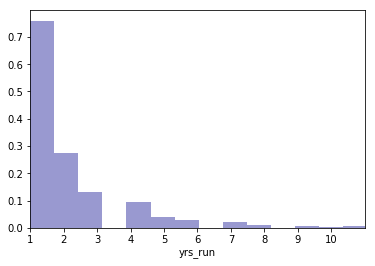

In [23]:
sns.distplot(shows[shows['status'] == 'Cancelled']['yrs_run'],color='DarkBlue',kde=False,norm_hist=True)
plt.xlim(1,11)
plt.xticks(np.arange(1,11))
plt.show()

In [24]:
cum_cancellations = np.cumsum(shows[shows['status'] == 'Cancelled']['yrs_run'].\
                              sort_values(ascending=True).value_counts())
cum_cancellations_pct = cum_cancellations/len(shows[shows['status'] == 'Cancelled'])

In [25]:
cum_cancellations_pct

1.0     0.546875
2.0     0.745192
3.0     0.840144
4.0     0.907452
5.0     0.936298
6.0     0.956731
7.0     0.972356
8.0     0.979567
9.0     0.985577
11.0    0.989183
10.0    0.991587
25.0    0.992788
12.0    0.993990
13.0    0.995192
14.0    0.996394
16.0    0.997596
20.0    0.998798
37.0    1.000000
Name: yrs_run, dtype: float64

Over 80% of cancellations of shows in the 21st century occurred within 3 years of premiere

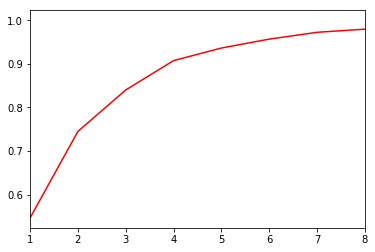

In [26]:
plt.plot(cum_cancellations_pct,color='Red')
plt.xlim(1,8)
plt.show()

This general trend is confirmed by the less complete IMDB 'total seasons' field.

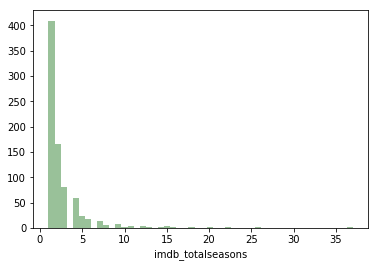

(1, 11)

In [27]:
a = shows[(shows['status'] == 'Cancelled')&(shows['imdb_totalseasons'].notnull())]['imdb_totalseasons']
sns.distplot(a,color='DarkGreen',kde=False)
plt.show()
plt.xlim(1,11)

In [28]:
shows = shows.reset_index().drop('index',axis=1)

In [29]:
shows.to_pickle("cleaned_dataset.pkl")
#shows = pd.read_pickle("cleaned_dataset.pkl")

We'll have to decide in the modeling phase which variable we want to use.

### Step 7: Dropping "Coming Soon" shows

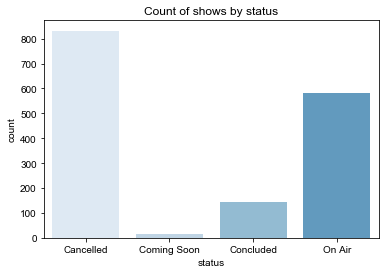

In [30]:
sns.set_palette('Blues')
sns.set_style('whitegrid')
sns.countplot(x=shows['status'])
plt.title("Count of shows by status")
plt.show()

There's not many of these, and we obviously can't model off them, so we might as well get rid of them.

In [31]:
shows = shows[shows['status'] != 'Coming Soon']
shows.shape

(1556, 52)

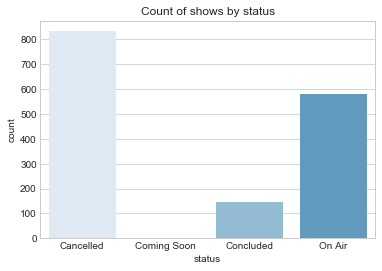

In [32]:
sns.countplot(x=shows['status'])
plt.title("Count of shows by status")
plt.show()

I'm also going to add flags for cancellation eligibility. So for example, shows airing in 2018 are generally not eligible for even one season cancellation, and 2017 shows are not usually eligible for cancellation before 2 seasons.

In [33]:
shows['one_season_elig'] = np.where(shows['start_year']<2018,1,0)
shows['two_season_elig'] = np.where(shows['start_year']<2017,1,0)
shows['three_season_elig'] = np.where(shows['start_year']<2016,1,0)

Saving the cleaned version to a pickle file:

In [34]:
shows.to_pickle("cleaned_onair.pkl")